# Neuronal Dynamics (Wulfram Gerstner) python exericses 1

Dependencies: 

 - brian2
 - neurodynamics course package: `conda install -c brian-team -c epfl-lcn neurodynex`
 - note that `neurodynex` only works in python2

Link to the exercise:
https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html



In [2]:
import sys 
sys.path.append('/home/timothysit/anaconda3/envs/bmnn/lib/python2.7/site-packages')

In [3]:
# hide warnings 
import warnings
warnings.filterwarnings('ignore')

## Example of integrate and fire simulation

In [4]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF 
from neurodynex.tools import input_factory, plot_tools

nr of spikes: 0


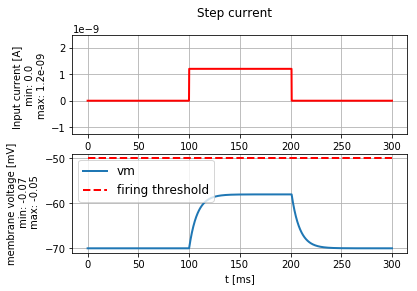

nr of spikes: 5


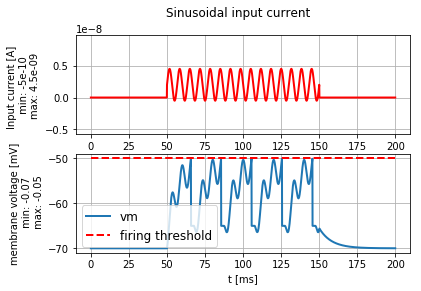

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [11]:
LIF.getting_started()
LIF.print_default_parameters()

## Minimal Current

**Calculation exercise** 

 - find the default parameters for the integrate and fire simulation 
 - use that the compute the minimla amplitude `i_min` of a step current that is needed to trigger a spike


Answer:

The relationship between the amplitude of the step current and the resulting new level of neuron potentail is calculated by:

$$
u(t) = u_\text{rest} + R I_0 \exp(-(t-t_0)/\tau)
$$

where for $t \rightarrow \infty$, $u(t) \rightarrow u_\text{rest} + RI_0$

Therefore, denoting the firing threshold as $\theta$, and setting $u(t) = \theta$, and can rearrange the equation to get an expression for $I_0$

\begin{align*}
\theta &= u_\text{rest} + R I_0 \\
I_0    &= \frac{\theta - u_\text{rest}}{R}
\end{align*}



In [12]:
# Printing default parameters
print('Resting potential: {}'.format(LIF.V_REST))
print('Firing threshold: {}'.format(LIF.FIRING_THRESHOLD))
print('Membrane resistance: {}'.format(LIF.MEMBRANE_RESISTANCE))

i_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / LIF.MEMBRANE_RESISTANCE

print('The minimal current for firing is: {}'.format(i_min))

Resting potential: -0.07
Firing threshold: -0.05
Membrane resistance: 10000000.0
The minimal current for firing is: 2e-09


**simulation exercise**

 - inject a step current of amplitude `i_min` for 100ms into the LIF neuron and plot the membrane potential
 - at this level, the potential approaches the threshold, but does *not* fire (it needs to be slightly greater than `i_min` to fire


Number of spikes: 0


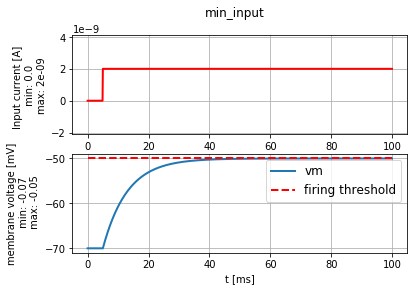

In [14]:
# create a step current with ampltiude 

step_current = input_factory.get_step_current(
               t_start=5, t_end=100, unit_time=b2.ms,
               amplitude = i_min
               )

# run the LIF model
# Unspecified paramters will be set to default parameters
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(
                                 input_current=step_current,
                                 simulation_time=100 * b2.ms
                                 )

# plot current I and neuron potential vm 
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min_input",
firing_threshold=LIF.FIRING_THRESHOLD)

print("Number of spikes: {}".format(spike_monitor.count[0])) # should be 0


## f-I curve

**Sketching exercise** 

For a neuron with refractory period of 3ms, sketch the f-I curve you expect to see

Answer: 
    
 - expect to see an initial low level of I resulting in no spikes
 - after a threhsold, there is some linear / near-linear relationship between the current and the firing rate
 - this will reach some maximum firing threshold, whereby increasing the current no longer increases the firing rate

**Calculation exercise**

What is the maximum rate at which this neuron can fire?

Answer: 

The maximum rate is given by the refractory period of 3ms. The rate is therefore: 

$$
\frac{1}{3 \text{ ms}} = 333.33 \text{ Hz} 
$$

**Simulation exercise**

 - Set the refractory period of the LIF neuron to be 3 ms
 - Inject currents of different amplitudes (from 0 nA to 100 nA) into a LIF neuron. For each current, run the simulation for 500 ms and determine the firing frequency in Hz. Then plot thee f-I curve. Pay attention to the low input current. 


In [23]:
current_amp_list = np.arange(0, 100, 10) 
# store firing rates
firing_rate_record = list()
refractory_period = 3 * b2.ms

for current_amp in current_amp_list:
    # create step current
    step_current = input_factory.get_step_current(
               t_start=10, t_end=490, unit_time=b2.ms,
               amplitude = current_amp * b2.mA
               )
    # run simulation 
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(
                                 input_current=step_current,
                                 simulation_time=500 * b2.ms,
    abs_refractory_period = refractory_period
                                 )
    # get the number of spikes 
    spike_count = spike_monitor.count[0]
    # conver that to firing rate
    firing_rate = spike_count / (480 * 10**-3) # current injected for 95ms
    firing_rate_record.append(firing_rate)

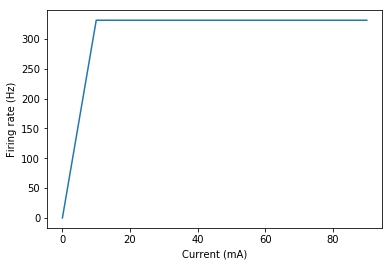

In [24]:
plt.figure()
plt.plot(current_amp_list, firing_rate_record)
plt.xlabel('Current (mA)')
plt.ylabel('Firing rate (Hz)')
plt.show()

## "Experimentally" measure the parameters of a LIF neuron

1. Get a random parameter set 
2. Create an input current of your choice 
3. Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms
4. Plot the membrane potential and estimate the parameters 
5. Compare your estimate with the true values

Parameters to estimate: 

 - resting potential 
 - reset voltage
 - firing threshold 
 - membrane resistance 
      - to estimate this, you may need to change your current
 - membrane time-scale (time constant)
      - to estimate this, you may need to change your current
 - absolute refractory period


(<matplotlib.axes._subplots.AxesSubplot at 0x7f2e9cd190d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e9c982090>)

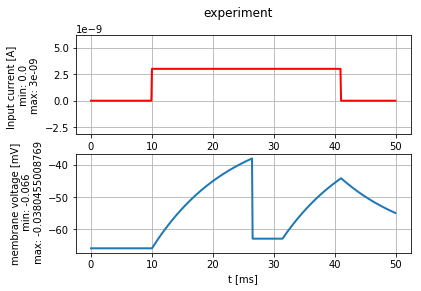

In [5]:
# get random parameter
random_parameters = LIF.get_random_param_set(random_seed=432)

# define test current 
test_current = input_factory.get_step_current(
t_start=10, t_end=40, unit_time=b2.ms, amplitude=3*b2.namp)

# probe the neuron. pass the test current AND the random parames to the function 
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot 
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title='experiment')

Let's have a look at what is stored in `state_monitor`

In [29]:
state_monitor.__dict__.keys()
# state_monitor.recorded_variables

['template_kwds',
 'when',
 'variables',
 'abstract_code',
 'recorded_variables',
 'n_indices',
 '_creation_stack',
 'override_conditional_write',
 'group',
 'record_all',
 'codeobj_class',
 '_network',
 '_stored_states',
 'namespace',
 'source',
 'generate_empty_code',
 'template',
 'needed_variables',
 '_scope_key',
 '_clock',
 '_indices',
 '_code_objects',
 'record_variables',
 'user_code',
 'codeobj',
 '_contained_objects',
 'check_units',
 '_full_creation_stack',
 '_active',
 '_name',
 'record',
 '_dependencies',
 'indices',
 '_group_attribute_access_active',
 '_id',
 'order']

Resting potential can be estimate by the minimum membrane voltage (since from the plot you can see that it is greater than the reset voltage)

In [20]:
print('Resting potential:', min(state_monitor.v[0]))

('Resting potential:', -66. * mvolt)


For the reset potential, I take the membrane potential from any time point from around 28 ms to 32 ms, which from the graph you can see stays the same after a spike.

From eyeballing, you can see that it is around -64 mV

In [48]:
state_monitor.t
indexOfInterest = np.where(state_monitor.t == 30.1 * b2.msecond)[0] # 30 ms
print('Reset potential:', state_monitor.v[0][indexOfInterest])

('Reset potential:', array([-63.]) * mvolt)


The membrane resistance is estimated by the equation: 

$$
V/I = R
$$

But there is an issue: the graph does not provide a value of the plateau (maximum) membrane voltage for the current input. It can be that the firing threshold is below the maximum voltage, and so the voltage is reset before we can see the maximum voltage value. If this is the case, we can simply plug in the above equation using the maximum voltage.

The easy way to do this (I have some idea about using the charge to estimate the resistance, but I don't know that will work) is to reduce the current so that the maximum neuron potential is below the firing threhsold.

Note that when changing the current, it is important that you apply the current long enough so that the potential saturates.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2e98eb8350>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e9805b410>)

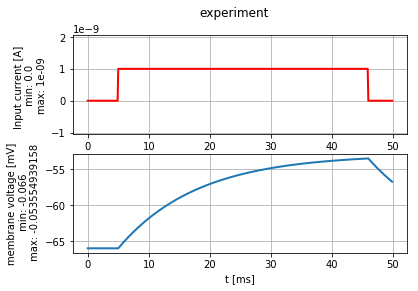

In [62]:
# get random parameter
random_parameters = LIF.get_random_param_set(random_seed=432)

# define test current 
test_current = input_factory.get_step_current(
t_start=5, t_end=45, unit_time=b2.ms, amplitude=1*b2.namp)

# probe the neuron. pass the test current AND the random parames to the function 
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot 
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title='experiment')

From a input current $I$ of 1 nA
And a maximum potential $u(t)$ of -53.55mV 
With the resting potetial of $u_\text{rest}$ of -66mV

We get a membrane resistance of:

$$
\frac{-53.55 - (-66) \text{ mV}}{1 \text{ nA}} = 12.45 \text{ M}\Omega
$$


The membrane time constant is estimated by substituting $\tau$ as the time in the equation of the passive membrane model

Let $t - t_0 = \tau$, we the have:

\begin{align*}
u(t) &= u_\text{rest} + RI (1 - \exp(-(t - t_0) / \tau) \\ 
u(t) &= u_\text{rest} + RI (1 - e^{-1}) \\ 
u(t) &\approx u_\text{rest} + 0.63RI \\ 
\end{align*}

Which means, we are looking at the time where the membrane potential is about 63% of the maximum.



In [69]:
u_rest = -66
u_max = -53.55
delta_u = u_max - u_rest
u_t = u_rest + 0.63 * delta_u 
print('Target u_t: %.2f mV' % u_t)

Target u_t: -58.16 mV


In [92]:
# Finding time where state_monitor.v[0] == u_t

# np.round(state_monitor.v[0], 4) # not sure have to round to '4 decimal places'
u_t_index = np.where(np.round(state_monitor.v[0], 4) == np.round(u_t, 1) * b2.mV)

tau = state_monitor.t[u_t_index[0][0]] # pick the first match

print('Time constant:', tau)

('Time constant:', 16.8 * msecond)


The absolute refractory period is estimated by looking at how long the membrane potential stay at the same value after a spike (despite constant current input). 

From eyeballing, this is about 5 ms

The firing threshold can be estimate by the amximum of the membrane voltage before it drops

In [19]:
print('Firing threshold:', max(state_monitor.v[0]))

('Firing threshold:', -38.04550088 * mvolt)


Printing out the actual values

In [93]:
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.066
Reset voltage: -0.063
Firing threshold: -0.038
Membrane resistance: 13000000.0
Membrane time-scale: 0.013
Absolute refractory period: 0.005


## Sinusoidal input current and subthreshold response

In the *subthreshold regime* (no spike) 

 - LIF neuron is a linear  system 
 - the membrane voltage is a *filtered* version of the input current 


nr of spikes: 0


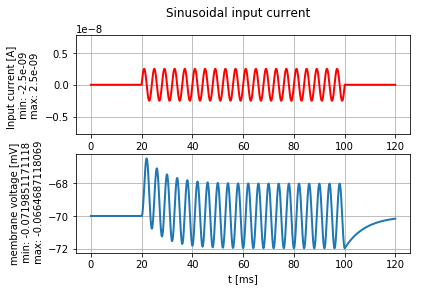

In [102]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

**simulation question**: For input frequencies between 10 Hz and 1 kHz, plot the resutling amplitude of subthreshold oscillations of the membrane potential vs. input frequency

 - it it interesting that the membrane potential sinusoid is initially high, and that decreases over time until it reaches some steady centre value
 - I am not sure why this is ???

This may slightly complicate the process of fiding the amplitude of oscillation, what is needed is to find the difference between the peak and the trough. But I am not sure if it matters whether the oscillatio n has 'settled' or not.

To do that, I will calculate all the amplitude values for corresponding positive peaks and troughs (negative peaks), and only use the mode (after some rouunding to take account of numerical inprecision).
 

In [133]:
from scipy.signal import find_peaks 
from scipy.stats import mode

def find_sinusoid_amplitude(sinusoid_signal):
    # assumes that sinusoid_signal is state_monitor.v[0]
    # not tested on general np arrays
    # assume the number of postiive peaks and negative peaks are equal
    positive_peaks_loc = find_peaks(sinusoid_signal)
    positive_peaks_val = sinusoid_signal[positive_peaks_loc[0]]

    negative_peaks_loc = find_peaks(-sinusoid_signal)
    negative_peaks_val = sinusoid_signal[negative_peaks_loc[0]]
    
    # remove positive peak without a negative peak pair 
    positive_peaks_val = positive_peaks_val[:len(negative_peaks_val)]

    amplitude = positive_peaks_val - negative_peaks_val
    amplitude_mode = mode(np.round(amplitude, 5))
    return amplitude_mode[0][0]

In [134]:
input_frequency_list = np.linspace(10, 1000, 50)
oscillation_amp_list = list()

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    sinusoid_amp = find_sinusoid_amplitude(state_monitor.v[0])
    oscillation_amp_list.append(sinusoid_amp)

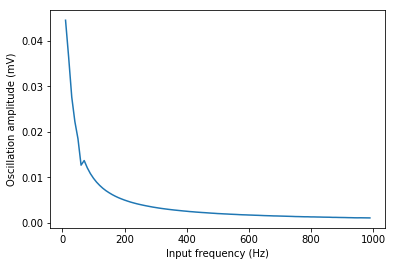

In [136]:
plt.figure()
plt.plot(input_frequency_list, oscillation_amp_list)
plt.xlabel('Input frequency (Hz)')
plt.ylabel('Oscillation amplitude (mV)')
plt.show()

**simulation question**: For input frequencies between 10 Hz and 1 kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency

A clarification of what a phase shift is:

 - the phase shift in this context refers to the phase shift between the oscillation of the current input and the membrane voltage ouptut 
 - you can think o fthis as the proportion of the cycle that is shifted between two corresponding points of the two sinusoids 
 - ie. the distance between the corresponding peaks of the two sinusoids, divided by the total length of the signal
 
I found a way of finding the phase hsift using `scipy.signal.correlate`, see: 

https://stackoverflow.com/questions/4688715/find-time-shift-between-two-similar-waveforms#4690225

Note that I used `np.asarray()` to remove the units on the values, so as to prevent any dimension inconsistency errors when calculating correlation.


In [141]:
from scipy import signal, fftpack    
import numpy as np
def find_phase_shift(a, b):
    phase_shift_raw = np.argmax(signal.correlate(b, a))
    signal_length = len(a) - 1
    phase_shift = phase_shift_raw - signal_length 
    return phase_shift

# test run on example
a = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])

# expect a phase shift value of 4 (arbitrary units)
print('Phase shift: %.2f' % find_phase_shift(a, b))

Phase shift 4.00


In [183]:
print(np.asarray(sinusoidal_current.values).shape)
print(np.asarray(state_monitor.v[0]).shape)

(1002, 1)
(1200,)


In [184]:
input_frequency_list = np.linspace(10, 1000, 50)
phase_shift_list = list()

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    current_val = np.asarray(sinusoidal_current.values)
    current_val = np.squeeze(current_val)
    
    voltage_val = np.asarray(state_monitor.v[0])
    # voltage_val = voltage_val[200:1000] # only when current is ON
    
    phase_shift_no_units = find_phase_shift(current_val, voltage_val)
    phase_shift = phase_shift_no_units * 0.1 * b2.ms 
    phase_shift_list.append(phase_shift)

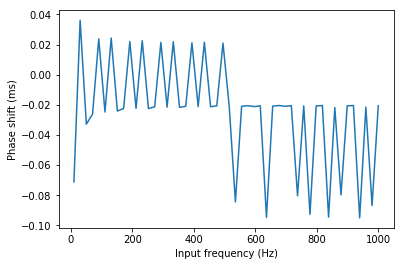

In [185]:
plt.figure()
plt.plot(input_frequency_list, phase_shift_list)
plt.ylabel('Phase shift (ms)')
plt.xlabel('Input frequency (Hz)')
plt.show()

**theory question**: To what type of filter (High-pass, Low-pass) does this correspond 